In [5]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
# os.environ["CUDA_VISIBLE_DEVICES"]="0" 
import random
# import keras
# import seq2seq
# from seq2seq.models import AttentionSeq2Seq
# from seq2seq.models import Seq2Seq
# from keras.utils import multi_gpu_model
# import tensorflow as tf
import numpy as np
import pandas as pd
import os
import shutil
import pickle
import tqdm
from tqdm import tqdm

import os, sys
import numpy as np
from random import shuffle
from math import log, floor
import pandas as pd
# import tensorflow as tf
# import tensorboard as tb
# from keras import backend as K
# from keras.models import *
# from keras.layers import *
# from keras.activations import *
# from keras.callbacks import *
from keras.utils import *
# from keras.layers.advanced_activations import *
# from keras import *
# from keras.engine.topology import *
# from keras.optimizers import *
import gensim
import sent2vec
from gensim.models.word2vec import *
from sklearn.metrics.pairwise import *
from keras.preprocessing.text import *
from keras.preprocessing.sequence import *
from keras.utils import *
from sklearn.model_selection import *
import random
from random import shuffle
import re
# from collections import Counter
from keras.utils.generic_utils import *
# from keras import regularizers
import string
import unicodedata as udata
import pickle
# from keras.applications import *
from keras.preprocessing.image import *
from multiprocessing import *

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import *
import pickle
from sklearn.decomposition import *
# from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
# from keras.models import *
# from keras import backend as K
# from keras.callbacks import *
# from keras.layers import *
# from keras.optimizers import *
# import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.decomposition import *
from sklearn.cluster import *
from collections import Counter
from operator import itemgetter
from collections import OrderedDict
# from sklearn.decomposition import *
# from sklearn.cluster import KMeans

一個api invocation call一個row

In [89]:
corpus = []
window_size = 6
dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
for hkl in tqdm(next(os.walk('data/aries_simplified_profile_1002/'))[2]):
    with open('data/aries_simplified_profile_1002/' + hkl , encoding='ISO 8859-1') as f:
        lines = f.read().splitlines()
#     corpus.append('BOS')
    for line in lines:
        temp = re.sub(dil," ",line)
#         temp = temp.replace('<BOS>','BOS')
#         temp = temp.replace('<MOS>','MOS')
#         temp = temp.replace('<EOS>','EOS')
#         temp = temp.replace('0','')
#         temp = temp.replace('PR','')
#         temp = temp.replace('Ret','')
#         temp = temp.replace('SUBK','')
        temp = temp.split(" ")
        temp = list(filter(None, temp))
        temp = ' '.join(temp)
        corpus.append(temp)
#     corpus.append('MOS')
#     corpus.append('PAD')
#     corpus.append('EOS')
#REP join
root_dir = './data/tree-rep-logs-profile/'
fam_dir = next(os.walk(root_dir))[1]
for fam in fam_dir:
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2] # get all filenames in the in_directory
        hl_list = [os.path.join(in_directory, f) for f in hl_list] # filepathname list
        hl_list = list(filter(lambda f: f.endswith("_rep.pickle"), hl_list)) #remove pickle
        for rep in hl_list:
            lines = pickle.load(open(rep,'rb'))
#             corpus.append('BOS')
            for line in lines:
                temp = re.sub(dil," ",line)
                temp = temp.replace('<BOS>','BOS')
                temp = temp.replace('<MOS>','MOS')
                temp = temp.replace('<EOS>','EOS')
#                 temp = temp.replace('0','')
#                 temp = temp.replace('PR','')
#                 temp = temp.replace('Ret','')
#                 temp = temp.replace('SUBK','')
        #         temp += ' <PAD>'*9 #每個row都加
                temp = temp.split(" ")
                temp = list(filter(None, temp))
                temp = ' '.join(temp)
                corpus.append(temp)
#             corpus.append('MOS')
            corpus.append('PAD')
#             corpus.append('EOS')
#     corpus.append(' PAD'*window_size)
#     corpus.append('BOS '*window_size)
#     corpus.append('EOS')
with open('data/asp1_sentences_rep_0117.txt','w') as f:
    f.write('\n'.join(corpus))

100%|██████████| 19987/19987 [00:20<00:00, 964.19it/s]


In [90]:
length = [len(x.split(' ')) for x in corpus]
count = np.bincount(sorted(length))
ser = pd.Series(sorted(length))
mode = np.argmax(count)
mode , ser.mode()

(13, 0    13
 dtype: int64)

In [91]:
corpus[:100]

['RegQueryValue PR HKLM sys_curCtlSet_ctl_mediaProperties PR SUBK wheel PR 0 PR 76b60b9c Ret 0',
 'RegQueryValue PR HKLM sys_setup PR SUBK systemsetupinprogress PR REG_DWORD PR 0 Ret 0',
 'LoadLibrary PR ARB windowsshell MANIFEST Ret N',
 'CreateFile PR ARB MANIFEST PR GENERIC_READ PR OPEN_EXISTING PR FILE_SHARE_DELETE FILE_SHARE_READ Ret P',
 'RegQueryValue PR HKCU desktop PR SUBK smoothscroll PR 0 PR 77462a48 Ret P',
 'RegQueryValue PR HKCU soft_ms_win_explorer advanced PR SUBK enableballoontips PR 0 PR 77462170 Ret P',
 'RegEnumValue PR HKLM soft_ms_winNT_languagepack PR SUBK surr PR REG_DWORD PR 2 Ret 0',
 'RegQueryValue PR HKCU desktop PR SUBK smoothscroll PR 0 PR 5d102058 Ret P',
 'RegQueryValue PR HKLM soft_ms_rpc PR SUBK maxrpcsize PR 12f520 PR 12f528 Ret P',
 'LoadLibrary PR SYS rpcrt4 DLL Ret P',
 'CreateFile PR pipe lsarpc NON PR GENERIC_READ GENERIC_WRITE PR OPEN_EXISTING PR FILE_SHARE_READ FILE_SHARE_WRITE Ret P',
 'LoadLibrary PR SYS psapi DLL Ret P',
 'LoadLibrary PR SYS

frequent word analysis

In [92]:
print(len(corpus))
kk = ' '.join(corpus)
kk = kk.split(' ')
kk = dict(Counter(kk))
kk

3700437


{'RegQueryValue': 1931898,
 'PR': 12206732,
 'HKLM': 1453162,
 'sys_curCtlSet_ctl_mediaProperties': 4431,
 'SUBK': 2189155,
 'wheel': 4431,
 '0': 2591733,
 '76b60b9c': 4431,
 'Ret': 3708061,
 'sys_setup': 46032,
 'systemsetupinprogress': 26922,
 'REG_DWORD': 400221,
 'LoadLibrary': 324554,
 'ARB': 84256,
 'windowsshell': 15176,
 'MANIFEST': 30847,
 'N': 188070,
 'CreateFile': 499200,
 'GENERIC_READ': 418796,
 'OPEN_EXISTING': 455057,
 'FILE_SHARE_DELETE': 48005,
 'FILE_SHARE_READ': 457032,
 'P': 1816287,
 'HKCU': 724142,
 'desktop': 41024,
 'smoothscroll': 25617,
 '77462a48': 14914,
 'soft_ms_win_explorer': 111466,
 'advanced': 62601,
 'enableballoontips': 14910,
 '77462170': 14910,
 'RegEnumValue': 200070,
 'soft_ms_winNT_languagepack': 14887,
 'surr': 14837,
 '2': 55938,
 '5d102058': 10572,
 'soft_ms_rpc': 11131,
 'maxrpcsize': 9524,
 '12f520': 68,
 '12f528': 67,
 'SYS': 446128,
 'rpcrt4': 12551,
 'DLL': 311992,
 'pipe': 31975,
 'lsarpc': 26460,
 'NON': 266218,
 'GENERIC_WRITE': 1565

In [35]:
kk['WinHttpWriteData'] , kk['RegQueryValue'] #minCOunt=5 

(6, 1931898)

In [36]:
kk_ = sorted(kk.items(), key=lambda x: (-x[1], x[0]))
dict(kk_)

{'RegQueryValue': 1931898,
 'P': 1816287,
 'HKLM': 1453162,
 'HKCU': 724142,
 'REG_SZ': 554291,
 'CreateFile': 499200,
 'FILE_SHARE_READ': 457032,
 'OPEN_EXISTING': 455057,
 'SYS': 446128,
 'GENERIC_READ': 418796,
 'REG_DWORD': 400221,
 'NON': 377962,
 'EXE': 374650,
 'software': 359989,
 'microsoft': 353369,
 'LoadLibrary': 324554,
 'DLL': 311992,
 'windows': 305641,
 'REG': 290840,
 'RegCreateKey': 285838,
 'currentversion': 273175,
 'parameters': 269015,
 'FILE_SHARE_WRITE': 251708,
 '1': 237929,
 'internet': 225832,
 'settings': 224098,
 'USR': 216910,
 'RegEnumValue': 200070,
 'N': 188070,
 'sys_curCtlSet_svc_tcpip': 170377,
 'HKCR': 166004,
 'Microsoft': 163818,
 'RegSetValue': 160808,
 'GENERIC_WRITE': 156550,
 'soft_ms_win_currentversion': 152032,
 'Windows': 149718,
 'CurrentVersion': 146282,
 'sys_curCtlSet_svc_winsock2_catalog9': 135519,
 'sys_curCtlSet_svc_winsock2_catalog5': 135021,
 'REG_EXPAND_SZ': 133814,
 'REG_BINARY': 123258,
 'packedcatalogitem': 121735,
 'hkey_local

一個profile一個row

In [118]:
corpus = []
temp2=''
window_size = 7
dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
for hkl in tqdm(next(os.walk('data/aries_simplified_profile_1002/'))[2]):
    with open('data/aries_simplified_profile_1002/' + hkl , encoding='ISO 8859-1') as f:
        lines = f.read().splitlines()
    for line in lines:
        temp = re.sub(dil," ",line)
        temp = temp.replace('PR','')
        temp = temp.replace('Ret','')
        temp = temp.replace('SUBK','')
#         temp += ' <PAD>'*9 #每個row都加
        temp = temp.split(" ")
        temp = list(filter(None, temp))
        temp2 += ' '.join(temp)
    temp2 += ' PAD'*window_size
    corpus.append(temp2)
    temp2=''
#REP join
root_dir = './data/tree-rep-logs-profile/'
fam_dir = next(os.walk(root_dir))[1]
for fam in fam_dir:
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2] # get all filenames in the in_directory
        hl_list = [os.path.join(in_directory, f) for f in hl_list] # filepathname list
        hl_list = list(filter(lambda f: f.endswith("_rep.pickle"), hl_list)) #remove pickle
        for rep in hl_list:
            lines = pickle.load(open(rep,'rb'))
            for line in lines:
                temp = re.sub(dil," ",line)
                temp = temp.replace('PR','')
                temp = temp.replace('Ret','')
                temp = temp.replace('SUBK','')
        #         temp += ' <PAD>'*9 #每個row都加
                temp = temp.split(" ")
                temp = list(filter(None, temp))
                temp2 += ' '.join(temp)
            temp2 += ' PAD'*window_size
            corpus.append(temp2)
            temp2=''
with open('data/asp1_sentences_profile_REP_7.txt','w') as f:
    f.write('\n'.join(corpus))

100%|██████████| 19987/19987 [00:25<00:00, 774.77it/s]


合併兩者

In [123]:
filenames = ['data/asp1_sentences_rev.txt', 'data/asp1_sentences_profile_REP_7.txt']
with open('data/asp1_sentencesREV_combine_7.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [20]:
corpus[0]

'RegQueryValue HKLM sys_curCtlSet_ctl_mediaProperties wheel 0 76b60b9c 0RegQueryValue HKLM sys_setup systemsetupinprogress REG_DWORD 0 0LoadLibrary ARB windowsshell MANIFEST NCreateFile ARB MANIFEST GENERIC_READ OPEN_EXISTING FILE_SHARE_DELETE FILE_SHARE_READ PRegQueryValue HKCU desktop smoothscroll 0 77462a48 PRegQueryValue HKCU soft_ms_win_explorer advanced enableballoontips 0 77462170 PRegEnumValue HKLM soft_ms_winNT_languagepack surr REG_DWORD 2 0RegQueryValue HKCU desktop smoothscroll 0 5d102058 PRegQueryValue HKLM soft_ms_rpc maxrpcsize 12f520 12f528 PLoadLibrary SYS rpcrt4 DLL PCreateFile pipe lsarpc NON GENERIC_READ GENERIC_WRITE OPEN_EXISTING FILE_SHARE_READ FILE_SHARE_WRITE PLoadLibrary SYS psapi DLL PLoadLibrary SYS version DLL PLoadLibrary SYS msimg32 DLL PLoadLibrary SYS wininet DLL PLoadLibrary SYS advapi32 DLL PLoadLibrary SYS advapi32 DLL PRegQueryValue HKLM sys_curCtlSet_ctl_sessionManager criticalsectiontimeout 0 12f42c 0RegQueryValue HKLM soft_ms_ole rwlockresourceti

corpus statistics

In [19]:
length = [len(x) for x in corpus]
count = np.bincount(sorted(length))
ser = pd.Series(sorted(length))
mode = np.argmax(count)
mode , ser.mode()

(36, 0    36
 dtype: int64)

In [23]:
np.quantile(sorted(length),0.25)

75.0

./fasttext sent2vec -input ~/leoqaz12_python/ANTS/malwareTagging/data/asp1_sentences.txt -output ~/leoqaz12_python/ANTS/malwareTagging/model/sent2vec_asp1.bin -minCount 135 -dim 150 -epoch 9 -lr 0.2 -wordNgrams 2 -loss ns -neg 10 -thread 35 -t 0.000005 -dropoutK 2 -minCountLabel 0 -bucket 100000

In [34]:
model = sent2vec.Sent2vecModel()
model.load_model('model/sent2vec_asp1.bin.bin') #
emb_all = model.embed_sentences(corpus)


In [55]:
emb = model.embed_sentence("HKLM soft_ms_winNT_fontlink microsoft 0 0 0") #RegEnumValue
emb2 = model.embed_sentence("HKLM soft_ms_winNT_fontlink tah 0 0 0") #RegEnumValue
emb3 = model.embed_sentence("HKLM soft_ms_winNT_fontlink lucida san 0 0 0") #RegEnumValue
emb4 = model.embed_sentence("ARB windowsshell MANIFEST N") #LoadLibrary
emb5 = model.embed_sentence("LOC NON LOC NON N") #CopyFile
cosine_similarity(emb,emb4)

array([[0.3523989]], dtype=float32)

## 評估embedding效果好壞從這邊開始，每個cell都要跑，要sorted
* kmeans
* 分五類，看看同類是否再一起
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

In [156]:
with open('data/asp1_sentences_rep_0117.txt','r') as f: #asp1_sentences_rep_0116
    corpus = f.read().splitlines()

In [157]:
corpus[:100]

['RegQueryValue PR HKLM sys_curCtlSet_ctl_mediaProperties PR SUBK wheel PR 0 PR 76b60b9c Ret 0',
 'RegQueryValue PR HKLM sys_setup PR SUBK systemsetupinprogress PR REG_DWORD PR 0 Ret 0',
 'LoadLibrary PR ARB windowsshell MANIFEST Ret N',
 'CreateFile PR ARB MANIFEST PR GENERIC_READ PR OPEN_EXISTING PR FILE_SHARE_DELETE FILE_SHARE_READ Ret P',
 'RegQueryValue PR HKCU desktop PR SUBK smoothscroll PR 0 PR 77462a48 Ret P',
 'RegQueryValue PR HKCU soft_ms_win_explorer advanced PR SUBK enableballoontips PR 0 PR 77462170 Ret P',
 'RegEnumValue PR HKLM soft_ms_winNT_languagepack PR SUBK surr PR REG_DWORD PR 2 Ret 0',
 'RegQueryValue PR HKCU desktop PR SUBK smoothscroll PR 0 PR 5d102058 Ret P',
 'RegQueryValue PR HKLM soft_ms_rpc PR SUBK maxrpcsize PR 12f520 PR 12f528 Ret P',
 'LoadLibrary PR SYS rpcrt4 DLL Ret P',
 'CreateFile PR pipe lsarpc NON PR GENERIC_READ GENERIC_WRITE PR OPEN_EXISTING PR FILE_SHARE_READ FILE_SHARE_WRITE Ret P',
 'LoadLibrary PR SYS psapi DLL Ret P',
 'LoadLibrary PR SYS

In [158]:
corpus = sorted(corpus)
# pickle.dump(file=open('output/corpus.pkl','wb'),obj=corpus)
corpus

['\x10 Ret P',
 '\x10 Ret P',
 '\x12an77 \x1a\x0e6\x0877rnetReadFile Ret P Ret P',
 '\x1b\x0f Ret P',
 '\x1b\x0f Ret P',
 '\x1b\x0f Ret P',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BOS',
 'BO

In [159]:
model = sent2vec.Sent2vecModel()
model.load_model('model/sent2vec_sentences_rep_0117.bin')
emb_all = model.embed_sentences(corpus)
pickle.dump(file=open('output/sent2vec_asp1_sentences_rep_0117-emb_all.pkl','wb'),obj=emb_all,protocol=4)
emb_all.shape

(3700443, 300)

In [160]:
api = ""
count = 0
count_all = {}
for row in corpus:
    try:
        count_all[row.split(' ')[0]] += 1
    except KeyError:
        count_all[row.split(' ')[0]] = 1

In [161]:
sorted(count_all.items())

[('\x10', 2),
 ('\x12an77', 1),
 ('\x1b\x0f', 3),
 ('BOS', 1368),
 ('CopyFile', 98611),
 ('CreateFile', 499200),
 ('CreateProcess', 7091),
 ('CreateRemoteThread', 20729),
 ('CreateThread', 19154),
 ('DeleteFile', 7702),
 ('EOS', 1368),
 ('ExitProcess', 5481),
 ('GetUrlCacheEntryInfo', 60),
 ('HttpSendRequest', 2898),
 ('InternetConnect', 3178),
 ('InternetOpen', 3112),
 ('LoadLibrary', 324554),
 ('MOS', 5513),
 ('OpenProcess', 39754),
 ('PAD', 1368),
 ('PR', 2),
 ('RegCreateKey', 285838),
 ('RegDeleteKey', 21434),
 ('RegDeleteValue', 7477),
 ('RegEnumValue', 200070),
 ('RegOpenCurrentUser', 1),
 ('RegQueryValue', 1931898),
 ('RegSetValue', 160808),
 ('TerminateProcess', 142),
 ('WJW', 2),
 ('WinExec', 881),
 ('WinHttpConnect', 10241),
 ('WinHttpOpen', 10251),
 ('WinHttpOpenRequest', 10231),
 ('WinHttpReadData', 9868),
 ('WinHttpSendRequest', 10137),
 ('WinHttpWriteData', 6),
 ('ol\x08\x01', 3),
 ('pÿ\x15ä\x10«q\x83èÿë', 2),
 ('\x8deôp\x8deøpÿ\x15p', 2),
 ('à\x89eüt', 2)]

In [162]:
api_li = ['LoadLibrary',
'CreateProcess',
'OpenProcess',
'ExitProcess',
'TerminateProcess',
'WinExec',
'CreateRemoteThread',
'CreateThread',
'CopyFile',
'CreateFile',
'DeleteFile',
'RegSetValue',
'RegCreateKey',
'RegDeleteKey',
'RegDeleteValue',
'RegOpenCurrentUser',
'RegQueryValue',
'RegEnumValue',
'WinHttpConnect',
'WinHttpOpen',
'WinHttpOpenRequest',
'WinHttpReadData',
'WinHttpSendRequest',
'WinHttpWriteData',
'InternetOpen',
'InternetConnect',
'HttpSendRequest',
'GetUrlCacheEntryInfo',
'BOS','MOS','EOS','PAD'
         ]
len(api_li)

32

In [163]:
c= 0
df = pd.DataFrame(0, index=api_li, columns=api_li)
index_ = df.index.tolist()
avg = 100
for _ in range(avg):
    c=0
    for k,v in count_all.items():
        pick = random.randrange(c,c+v) #cosine similarity的左邊
        pick = emb_all[pick,:] #sorted corpus的embedding_all
        c1 = 0
        try:
            row = index_.index(k)
        except ValueError:
            continue
        for k1,v1 in count_all.items(): # cosine similarity的右邊
            pick1 = random.randrange(c1,c1+v1)
            pick1 = emb_all[pick1,:]
            score = cosine_similarity([pick],[pick1]) #cosine_similarity
    #         print(score)
            c1 = c1+v1
            try:
                col = index_.index(k1)
                df.iloc[row,col] += float(score)
            except ValueError:
                continue
        c = c+v
df = df/avg #similarity
# df = (df-np.min(df.values))/(np.max(df.values)-np.min(df.values)) #distance normalize
df

,LoadLibrary,CreateProcess,OpenProcess,ExitProcess,TerminateProcess,WinExec,CreateRemoteThread,CreateThread,CopyFile,CreateFile,...,WinHttpSendRequest,WinHttpWriteData,InternetOpen,InternetConnect,HttpSendRequest,GetUrlCacheEntryInfo,BOS,MOS,EOS,PAD
LoadLibrary,0.947779,0.745506,0.696214,0.610032,0.693970,0.767739,0.673890,0.673873,0.717994,0.744839,...,0.505062,0.563621,0.544681,0.549016,0.598907,0.511168,-0.087953,0.020360,0.074788,0.002851
CreateProcess,0.741135,0.918846,0.806146,0.619822,0.789637,0.926730,0.786871,0.771040,0.788248,0.785571,...,0.610043,0.758020,0.686347,0.673261,0.752980,0.677724,-0.105743,0.092850,0.121065,0.050237
OpenProcess,0.705918,0.817508,0.911572,0.602207,0.779014,0.886573,0.761437,0.756643,0.699385,0.713480,...,0.584941,0.768069,0.689544,0.767321,0.703255,0.632812,-0.046801,0.125077,0.078838,0.061541
ExitProcess,0.604508,0.615957,0.596907,0.925782,0.815460,0.636121,0.812606,0.814532,0.639683,0.711051,...,0.450373,0.531548,0.704553,0.482456,0.603505,0.499170,-0.029099,0.027822,0.097712,0.016748
TerminateProcess,0.682444,0.772829,0.749059,0.826871,0.893128,0.824338,0.859685,0.886018,0.706702,0.758809,...,0.566497,0.739762,0.762533,0.674479,0.721756,0.617437,-0.063295,0.064873,0.099989,0.023868
WinExec,0.772228,0.925595,0.881835,0.639806,0.840693,0.997891,0.831383,0.834626,0.787810,0.786151,...,0.681260,0.848974,0.747012,0.804186,0.783546,0.699010,-0.094218,0.127129,0.115681,0.046921
CreateRemoteThread,0.672181,0.785904,0.759745,0.819330,0.878327,0.829413,0.982091,0.939329,0.790412,0.805049,...,0.603471,0.708263,0.761674,0.666510,0.784917,0.672044,-0.053864,0.092942,0.079774,0.060650
CreateThread,0.675572,0.779282,0.756999,0.826948,0.897254,0.833636,0.936909,0.981260,0.757218,0.799394,...,0.608919,0.712868,0.773367,0.672277,0.736553,0.601709,-0.075543,0.094114,0.086332,0.035139
CopyFile,0.735568,0.802338,0.703626,0.646862,0.717855,0.793082,0.796630,0.749207,0.905861,0.835963,...,0.544604,0.560401,0.588837,0.508789,0.731387,0.613457,-0.126982,0.054074,0.048388,0.032074
CreateFile,0.755980,0.792357,0.725989,0.724210,0.758825,0.790624,0.806999,0.793584,0.835972,0.923186,...,0.538239,0.514590,0.613649,0.478546,0.711299,0.575037,-0.123370,0.082477,0.079242,0.024976


In [164]:
lib = ['LoadLibrary']
proc = ['CreateProcess', 'OpenProcess', 'ExitProcess', 'TerminateProcess', 'WinExec',
        'CreateRemoteThread', 'CreateThread']
file = ['CopyFile', 'CreateFile', 'DeleteFile']
reg = ['RegSetValue', 'RegCreateKey', 'RegDeleteKey', 'RegDeleteValue', 'RegOpenCurrentUser',
       'RegQueryValue', 'RegEnumValue']
net = ['WinHttpConnect', 'WinHttpOpen', 'WinHttpOpenRequest', 'WinHttpReadData', 'WinHttpSendRequest',
       'WinHttpWriteData', 'InternetOpen', 'InternetConnect', 'HttpSendRequest', 'GetUrlCacheEntryInfo']
# df.loc['']
index_

['LoadLibrary',
 'CreateProcess',
 'OpenProcess',
 'ExitProcess',
 'TerminateProcess',
 'WinExec',
 'CreateRemoteThread',
 'CreateThread',
 'CopyFile',
 'CreateFile',
 'DeleteFile',
 'RegSetValue',
 'RegCreateKey',
 'RegDeleteKey',
 'RegDeleteValue',
 'RegOpenCurrentUser',
 'RegQueryValue',
 'RegEnumValue',
 'WinHttpConnect',
 'WinHttpOpen',
 'WinHttpOpenRequest',
 'WinHttpReadData',
 'WinHttpSendRequest',
 'WinHttpWriteData',
 'InternetOpen',
 'InternetConnect',
 'HttpSendRequest',
 'GetUrlCacheEntryInfo',
 'BOS',
 'MOS',
 'EOS',
 'PAD']

In [165]:
x = [lib,proc,file,reg,net]
x = sum(x,[])

In [166]:
up=0
down = len(index_)
down_cat = len(x)
up_cat = 0
up_cat2 = 0
lib_lib=lib_proc=lib_file=lib_reg=lib_net = 0
proc_lib=proc_proc=proc_file=proc_reg=proc_net = 0
file_lib=file_proc=file_file=file_reg=file_net = 0
reg_lib=reg_proc=reg_file=reg_reg=reg_net = 0
net_lib=net_proc=net_file=net_reg=net_net = 0
for api in index_:
    if df.loc[api].idxmax() == api:
        up+=1
    baseline_lib = df.loc[api,lib].mean()
    baseline_proc =  df.loc[api,proc].mean()
    baseline_file = df.loc[api,file].mean()
    baseline_reg = df.loc[api,reg].mean()
    baseline_net = df.loc[api,net].mean()
    max_value = np.max([baseline_lib,baseline_proc,baseline_file,baseline_reg,baseline_net])
    if (api in lib):
        lib_lib += baseline_lib
        lib_proc += baseline_proc
        lib_file += baseline_file
        lib_reg += baseline_reg
        lib_net += baseline_net
        if (max_value==baseline_lib):
            up_cat+=1
    elif api in proc :
        proc_lib += baseline_lib
        proc_proc += baseline_proc
        proc_file += baseline_file
        proc_reg += baseline_reg
        proc_net += baseline_net
        if max_value==baseline_proc:
            up_cat+=1
    elif api in file :
        file_lib += baseline_lib
        file_proc += baseline_proc
        file_file += baseline_file
        file_reg += baseline_reg
        file_net += baseline_net
        if max_value==baseline_file:
            up_cat+=1    
    elif api in reg:
        reg_lib += baseline_lib
        reg_proc += baseline_proc
        reg_file += baseline_file
        reg_reg += baseline_reg
        reg_net += baseline_net
        if max_value==baseline_reg:
            up_cat+=1    
    elif api in net:
        net_lib += baseline_lib
        net_proc += baseline_proc
        net_file += baseline_file
        net_reg += baseline_reg
        net_net += baseline_net
        if max_value==baseline_net:
            up_cat+=1
if np.max([lib_lib,lib_proc,lib_file,lib_reg,lib_net]) == lib_lib:
    up_cat2+=1
if np.max([proc_lib,proc_proc,proc_file,proc_reg,proc_net]) == proc_proc:
    up_cat2+=1
if np.max([file_lib,file_proc,file_file,file_reg,file_net]) == file_file:
    up_cat2+=1
if np.max([reg_lib,reg_proc,reg_file,reg_reg,reg_net]) == reg_reg:
    up_cat2+=1
if np.max([net_lib,net_proc,net_file,net_reg,net_net]) == net_net:
    up_cat2+=1
        
print('自己還原自己-ACC:',(up/down)*100,'%') #self
print('自己屬於自己那一類-ACC',(up_cat/down_cat)*100,'%') #micro
print('自己那類屬於自己那一類-ACC',(up_cat2/5)*100,'%') #macro
# df.loc['LoadLibrary'].idxmax()

自己還原自己-ACC: 87.5 %
自己屬於自己那一類-ACC 60.71428571428571 %
自己那類屬於自己那一類-ACC 80.0 %


sent2vec_sentences_rep_0116:
* 自己還原自己-ACC: 87.5 %
* 自己屬於自己那一類-ACC 46.42857142857143 %
* 自己那類屬於自己那一類-ACC 40.0 %

./fasttext sent2vec -input ~/leoqaz12_python/ANTS/malwareTagging/data/asp1_sentences_rep_0117.txt -output ~/leoqaz12_python/ANTS/malwareTagging/model/sent2vec_sentences_rep_0117 -minCount 0 -dim 300 -epoch 15 -lr 0.3 -wordNgrams 13 -loss ns -neg 10 -thread 35  -dropoutK 1 -minCountLabel 0 -bucket 2000000 -t 0.00001
* 自己還原自己-ACC: 87.5 %
* 自己屬於自己那一類-ACC 75.0 %
* 自己那類屬於自己那一類-ACC 100.0 %

In [122]:
df.loc[api].idxmax()== api

True

In [74]:
np.max([1,2,3,4])

4

In [69]:
df.loc['LoadLibrary',proc].mean()

0.6243872765466637

In [111]:
df.to_excel('output/sentemb_cosineSim_rev_96.xlsx',header=True,index=True)

In [46]:
c= 0
df = pd.DataFrame(0, index=api_li, columns=api_li)
index_ = df.index.tolist()
avg = 100
for _ in range(avg):
    c=0
    for k,v in count_all.items():
        pick = random.randrange(c,c+v) #cosine similarity的左邊
        pick = emb_all[pick,:] #sorted corpus的embedding_all
        c1 = 0
        try:
            row = index_.index(k)
        except ValueError:
            continue
        for k1,v1 in count_all.items(): # cosine similarity的右邊
            pick1 = random.randrange(c1,c1+v1)
            pick1 = emb_all[pick1,:]
            score = cosine_similarity([pick],[pick1]) #cosine_similarity
    #         print(score)
            c1 = c1+v1
            try:
                col = index_.index(k1)
                df.iloc[row,col] += float(score)
            except ValueError:
                continue
        c = c+v
df = df/avg #similarity
# df = (df-np.min(df.values))/(np.max(df.values)-np.min(df.values)) #distance normalize
df

,LoadLibrary,CreateProcess,OpenProcess,ExitProcess,TerminateProcess,WinExec,CreateRemoteThread,CreateThread,CopyFile,CreateFile,...,WinHttpSendRequest,WinHttpWriteData,InternetOpen,InternetConnect,HttpSendRequest,GetUrlCacheEntryInfo,BOS,MOS,EOS,PAD
LoadLibrary,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CreateProcess,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OpenProcess,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ExitProcess,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TerminateProcess,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WinExec,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CreateRemoteThread,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CreateThread,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CopyFile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CreateFile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
c = 0
for k,v in count_all.items():
    print(k,":",c,c+v)
    c= c+v

 : 0 2
an77 : 2 3
 : 3 6
CopyFile : 6 90697
CreateFile : 90697 562149
CreateProcess : 562149 568919
CreateRemoteThread : 568919 587994
CreateThread : 587994 605540
DeleteFile : 605540 612948
ExitProcess : 612948 618130
GENERIC_READ : 618130 618131
GENERIC_WRITE : 618131 618132
GetUrlCacheEntryInfo : 618132 618190
HttpSendRequest : 618190 620976
InternetConnect : 620976 624050
InternetOpen : 624050 627109
LoadLibrary : 627109 933534
OpenProcess : 933534 972132
RegCreateKey : 972132 1247516
RegDeleteKey : 1247516 1268820
RegDeleteValue : 1268820 1275939
RegEnumValue : 1275939 1464957
RegOpenCurrentUser : 1464957 1464958
RegQueryValue : 1464958 3295085
RegSetValue : 3295085 3447562
TerminateProcess : 3447562 3447697
WJW : 3447697 3447699
WinExec : 3447699 3448533
WinHttpConnect : 3448533 3458627
WinHttpOpen : 3458627 3468728
WinHttpOpenRequest : 3468728 3478818
WinHttpReadData : 3478818 3488562
WinHttpSendRequest : 3488562 3498683
WinHttpWriteData : 3498683 3498689
ol : 3498689 3498

In [178]:
print(corpus[1464957])
emb_all[1464957,:]


RegOpenCurrentUser


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [181]:
print(corpus[100])
emb_all[100,:]


RegQueryValue HKLM sys_curCtlSet_svc_winsock2_catalog5 librarypath REG_SZ SystemRoot System32 mswsock dll 0


array([ 0.23223364, -0.4860207 ,  0.27116448,  0.60665643, -0.18243237,
       -0.08847525, -0.42184988, -0.25906163, -0.40963772,  0.05810967,
        0.01189266,  0.06810217, -0.62278825, -0.6490162 , -0.15002665,
        0.03270629, -0.37124175, -0.4889446 , -0.2926761 ,  0.11110612,
       -0.15569319,  0.55137974, -0.02529793, -0.3124278 , -0.18948846,
        0.5255612 ,  0.10523912,  0.577922  ,  0.41232356, -0.15756352,
        0.33444133, -0.03264356,  0.00899265,  0.41873807,  1.050696  ,
        0.04325128, -0.635422  ,  0.3891121 , -0.21773767,  0.65026987,
       -0.35262108,  0.03150808, -0.00780785, -0.127722  ,  0.35655   ,
       -0.35841233,  0.05608008, -0.18556623,  0.05605529,  0.5776117 ,
        0.29552212,  0.06851164,  0.38161877, -0.17397879,  0.10940777,
       -0.06155649,  0.5191906 , -0.14985728, -0.19093578, -0.49996126,
        0.01051315, -0.08776131, -0.06701039, -0.60613835,  0.0341539 ,
       -0.4112475 ,  0.23809184, -0.34451967, -0.40943322,  0.26

In [150]:
c= 0
df = pd.DataFrame(0, index=api_li, columns=api_li)
index_ = df.index.tolist()
for k,v in count_all.items():
    pick = random.randrange(c,c+v) #cosine similarity的左邊
    pick = emb_all[pick,:]
    c1 = 0
    try:
        row = index_.index(k)
    except ValueError:
        continue
    for k1,v1 in count_all.items(): # cosine similarity的右邊
        pick1 = random.randrange(c1,c1+v1)
        pick1 = emb_all[pick1,:]
        score = cosine_similarity([pick],[pick1])
#         print(score)
        c1 = c1+v1
        try:
            col = index_.index(k1)
            df.iloc[row,col] = float(score)
        except ValueError:
            continue
    c = c+v
df

,LoadLibrary,CreateProcess,OpenProcess,ExitProcess,TerminateProcess,WinExec,CreateRemoteThread,CreateThread,CopyFile,CreateFile,...,WinHttpConnect,WinHttpOpen,WinHttpOpenRequest,WinHttpReadData,WinHttpSendRequest,WinHttpWriteData,InternetOpen,InternetConnect,HttpSendRequest,GetUrlCacheEntryInfo
LoadLibrary,0.995867,0.665108,0.873951,0.632608,0.546738,0.676405,0.475463,0.685234,0.393596,0.770102,...,0.489498,0.112805,0.456461,0.765991,0.486920,0.521423,0.108501,0.719671,0.476959,0.156108
CreateProcess,0.677023,0.515900,0.787820,0.504075,0.670904,0.975715,0.439688,0.562654,0.711956,0.727283,...,0.472047,0.096746,0.502297,0.524840,0.485972,0.582321,0.618767,0.565578,0.571388,0.279202
OpenProcess,0.889513,0.787820,1.000000,0.606747,0.551208,0.800135,0.666223,0.692285,0.807866,0.674875,...,0.527856,0.153193,0.534712,0.855675,0.488465,0.571510,0.785203,0.730303,0.567428,0.252240
ExitProcess,0.349935,0.411653,0.606747,1.000000,0.783435,0.500517,0.403173,0.681946,0.476548,0.525657,...,0.348487,0.239485,0.384565,0.586936,0.461867,0.434745,0.614913,0.550576,0.601761,0.348775
TerminateProcess,0.488921,0.502430,0.527220,0.454398,1.000000,0.538286,0.850740,0.596024,0.537599,0.478976,...,0.416238,0.235161,0.447656,0.753300,0.334689,0.931494,0.399720,0.591983,0.403033,0.114839
WinExec,0.721760,0.975715,0.800135,0.500517,0.394499,1.000000,0.418399,0.579352,0.676218,0.486575,...,0.493092,0.083856,0.522531,0.822613,0.508914,0.600786,0.794148,0.664380,0.809290,0.193365
CreateRemoteThread,0.580036,0.234538,0.460478,0.508993,0.687458,0.460138,0.809455,0.874300,0.355386,0.375536,...,0.419255,0.273527,0.461899,0.579592,0.404253,0.448798,0.282200,0.462891,0.271349,0.050903
CreateThread,0.527725,0.437038,0.519917,0.437681,0.614342,0.437656,0.784188,0.812355,0.574582,0.395596,...,0.407876,0.252457,0.461606,0.542003,0.395517,0.762256,0.426223,0.476041,0.270433,0.051476
CopyFile,0.682782,0.561064,0.679035,0.476548,0.553082,0.676218,0.596596,0.637574,1.000000,0.820277,...,0.446221,0.244374,0.399680,0.654222,0.448443,0.487317,0.642228,0.505723,0.551095,0.253942
CreateFile,0.677348,0.668494,0.631091,0.525657,0.380545,0.657066,0.639330,0.705477,0.798398,0.816410,...,0.435152,0.277223,0.432085,0.618881,0.647300,0.690021,0.410071,0.473886,0.323734,0.111607


In [65]:
emb_all.shape , df.index.tolist().index('CreateProcess')

((3498692, 150), 1)

In [148]:
df

,LoadLibrary,CreateProcess,OpenProcess,ExitProcess,TerminateProcess,WinExec,CreateRemoteThread,CreateThread,CopyFile,CreateFile,...,WinHttpConnect,WinHttpOpen,WinHttpOpenRequest,WinHttpReadData,WinHttpSendRequest,WinHttpWriteData,InternetOpen,InternetConnect,HttpSendRequest,GetUrlCacheEntryInfo
LoadLibrary,0.991217,0.231745,0.733297,0.623863,0.538695,0.686405,0.650432,0.679005,0.311704,0.572661,...,0.482826,0.079271,0.441784,0.763667,0.762198,0.515141,0.078028,0.633604,0.746696,0.210946
CreateProcess,0.667992,0.791075,0.787820,0.504075,0.670904,0.975715,0.404437,0.562654,0.787496,0.634780,...,0.472047,0.096746,0.502297,0.776889,0.485972,0.582321,0.676050,0.578428,0.571388,0.279202
OpenProcess,0.889513,0.787820,1.000000,0.191027,0.759537,0.800135,0.666223,0.692285,0.632811,0.760885,...,0.527856,0.153193,0.534712,0.855675,0.488465,0.571510,0.274256,0.747325,0.567428,0.225579
ExitProcess,0.626198,0.221196,0.606747,1.000000,0.783435,0.500517,0.638419,0.681946,0.517783,0.542829,...,0.348487,0.239485,0.384565,0.586936,0.461867,0.434745,0.610985,0.544371,0.521880,0.348775
TerminateProcess,0.399372,0.553927,0.551208,0.790607,0.706326,0.502773,0.648616,0.671500,0.396973,0.499231,...,0.312231,0.226536,0.400266,0.537835,0.346554,0.417801,0.595593,0.503045,0.734173,0.575739
WinExec,0.554411,0.259984,0.511840,0.905094,0.697621,0.456558,0.681917,0.665071,0.448070,0.490882,...,0.397149,0.247290,0.395868,0.497785,0.470262,0.398432,0.605316,0.368295,0.380029,0.144536
CreateRemoteThread,0.422405,0.510604,0.666223,0.638419,0.648616,0.540307,0.925850,0.926998,0.639143,0.565753,...,0.463502,0.264730,0.531085,0.655721,0.461263,0.492498,0.654607,0.576085,0.590852,0.055098
CreateThread,0.621082,0.461460,0.632842,0.177329,0.664911,0.469151,0.958448,0.914084,0.496616,0.620618,...,0.379103,0.267948,0.469233,0.604652,0.455028,0.445868,0.463169,0.437741,0.295987,0.033814
CopyFile,0.689408,0.711956,0.679035,0.476548,0.438993,0.676218,0.563353,0.637574,1.000000,0.767193,...,0.446221,0.244374,0.399680,0.654222,0.631712,0.487317,0.358372,0.536762,0.387750,0.253942
CreateFile,0.424214,0.449940,0.494275,0.354739,0.426922,0.450834,0.393515,0.436563,0.535569,0.667183,...,0.340707,0.215595,0.360582,0.404548,0.360010,0.353373,0.310434,0.301143,0.447886,0.281502


In [43]:
api_li = ['LoadLibrary',
'CreateProcess',
'OpenProcess',
'ExitProcess',
'TerminateProcess',
'WinExec',
'CreateRemoteThread',
'CreateThread',
'CopyFile',
'CreateFile',
'DeleteFile',
'RegSetValue',
'RegCreateKey',
'RegDeleteKey',
'RegDeleteValue',
'RegOpenCurrentUser',
'RegQueryValue',
'RegEnumValue',
'WinHttpConnect',
'WinHttpOpen',
'WinHttpOpenRequest',
'WinHttpReadData',
'WinHttpSendRequest',
'WinHttpWriteData',
'InternetOpen',
'InternetConnect',
'HttpSendRequest',
'GetUrlCacheEntryInfo',
'BOS','MOS','EOS','PAD'
         ]
len(api_li)

32

In [189]:
df = pd.get_dummies(pd.Series(api_li))
pickle.dump(obj=df,file=open('output/api_enc2.pkl','wb'))

In [64]:
print(df.index)



Index(['LoadLibrary', 'CreateProcess', 'OpenProcess', 'ExitProcess',
       'TerminateProcess', 'WinExec', 'CreateRemoteThread', 'CreateThread',
       'CopyFile', 'CreateFile', 'DeleteFile', 'RegSetValue', 'RegCreateKey',
       'RegDeleteKey', 'RegDeleteValue', 'RegOpenCurrentUser', 'RegQueryValue',
       'RegEnumValue', 'WinHttpConnect', 'WinHttpOpen', 'WinHttpOpenRequest',
       'WinHttpReadData', 'WinHttpSendRequest', 'WinHttpWriteData',
       'InternetOpen', 'InternetConnect', 'HttpSendRequest',
       'GetUrlCacheEntryInfo'],
      dtype='object')


1

In [ ]:
api_li = ['LoadLibrary',
 'RegQueryValue',
 'CreateFile',
 'RegOpenCurrentUser',
 'RegEnumValue',
 'RegCreateKey',
 'OpenProcess',
 'CreateRemoteThread',
 'CreateThread',
 'RegSetValue',
 'RegDeleteValue',
 'InternetOpen',
 'InternetConnect',
 'HttpSendRequest',
 'ExitProcess',
 'CreateProcess',
 'DeleteFile',
 'WinHttpOpen',
 'WinHttpConnect',
 'WinHttpOpenRequest',
 'WinHttpSendRequest',
 'WinHttpReadData',
 'CopyFile',
 'RegDeleteKey',
 'TerminateProcess',
 'WinExec',
 'GetUrlCacheEntryInfo',
 'WinHttpWriteData']

In [44]:
X_embeded = TSNE(n_components=2,verbose=1).fit_transform(emb_all)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3498692 samples in 274.797s...
[t-SNE] Computed neighbors for 3498692 samples in 17607.182s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3000 / 3498692
[t-SNE] Computed conditional probabilities for sample 4000 / 3498692
[t-SNE] Computed conditional probabilities for sample 5000 / 3498692
[t-SNE] Computed conditional probabilities for sample 6000 / 3498692
[t-SNE] Computed conditional probabilities for sample 7000 / 3498692
[t-SNE] Computed conditional probabilities for sample 8000 / 3498692
[t-SNE] Computed conditional probabilities for sample 9000 / 3498692
[t-SNE] Computed conditional probabilities for sample 10000 / 3498692
[t-SNE] Computed conditional probabilities for sample 11000 / 3498692
[t-SNE] Computed conditional probabilities for sample 12000 / 3498692
[t-SNE] Computed

[t-SNE] Computed conditional probabilities for sample 118000 / 3498692
[t-SNE] Computed conditional probabilities for sample 119000 / 3498692
[t-SNE] Computed conditional probabilities for sample 120000 / 3498692
[t-SNE] Computed conditional probabilities for sample 121000 / 3498692
[t-SNE] Computed conditional probabilities for sample 122000 / 3498692
[t-SNE] Computed conditional probabilities for sample 123000 / 3498692
[t-SNE] Computed conditional probabilities for sample 124000 / 3498692
[t-SNE] Computed conditional probabilities for sample 125000 / 3498692
[t-SNE] Computed conditional probabilities for sample 126000 / 3498692
[t-SNE] Computed conditional probabilities for sample 127000 / 3498692
[t-SNE] Computed conditional probabilities for sample 128000 / 3498692
[t-SNE] Computed conditional probabilities for sample 129000 / 3498692
[t-SNE] Computed conditional probabilities for sample 130000 / 3498692
[t-SNE] Computed conditional probabilities for sample 131000 / 3498692
[t-SNE

[t-SNE] Computed conditional probabilities for sample 236000 / 3498692
[t-SNE] Computed conditional probabilities for sample 237000 / 3498692
[t-SNE] Computed conditional probabilities for sample 238000 / 3498692
[t-SNE] Computed conditional probabilities for sample 239000 / 3498692
[t-SNE] Computed conditional probabilities for sample 240000 / 3498692
[t-SNE] Computed conditional probabilities for sample 241000 / 3498692
[t-SNE] Computed conditional probabilities for sample 242000 / 3498692
[t-SNE] Computed conditional probabilities for sample 243000 / 3498692
[t-SNE] Computed conditional probabilities for sample 244000 / 3498692
[t-SNE] Computed conditional probabilities for sample 245000 / 3498692
[t-SNE] Computed conditional probabilities for sample 246000 / 3498692
[t-SNE] Computed conditional probabilities for sample 247000 / 3498692
[t-SNE] Computed conditional probabilities for sample 248000 / 3498692
[t-SNE] Computed conditional probabilities for sample 249000 / 3498692
[t-SNE

[t-SNE] Computed conditional probabilities for sample 353000 / 3498692
[t-SNE] Computed conditional probabilities for sample 354000 / 3498692
[t-SNE] Computed conditional probabilities for sample 355000 / 3498692
[t-SNE] Computed conditional probabilities for sample 356000 / 3498692
[t-SNE] Computed conditional probabilities for sample 357000 / 3498692
[t-SNE] Computed conditional probabilities for sample 358000 / 3498692
[t-SNE] Computed conditional probabilities for sample 359000 / 3498692
[t-SNE] Computed conditional probabilities for sample 360000 / 3498692
[t-SNE] Computed conditional probabilities for sample 361000 / 3498692
[t-SNE] Computed conditional probabilities for sample 362000 / 3498692
[t-SNE] Computed conditional probabilities for sample 363000 / 3498692
[t-SNE] Computed conditional probabilities for sample 364000 / 3498692
[t-SNE] Computed conditional probabilities for sample 365000 / 3498692
[t-SNE] Computed conditional probabilities for sample 366000 / 3498692
[t-SNE

[t-SNE] Computed conditional probabilities for sample 472000 / 3498692
[t-SNE] Computed conditional probabilities for sample 473000 / 3498692
[t-SNE] Computed conditional probabilities for sample 474000 / 3498692
[t-SNE] Computed conditional probabilities for sample 475000 / 3498692
[t-SNE] Computed conditional probabilities for sample 476000 / 3498692
[t-SNE] Computed conditional probabilities for sample 477000 / 3498692
[t-SNE] Computed conditional probabilities for sample 478000 / 3498692
[t-SNE] Computed conditional probabilities for sample 479000 / 3498692
[t-SNE] Computed conditional probabilities for sample 480000 / 3498692
[t-SNE] Computed conditional probabilities for sample 481000 / 3498692
[t-SNE] Computed conditional probabilities for sample 482000 / 3498692
[t-SNE] Computed conditional probabilities for sample 483000 / 3498692
[t-SNE] Computed conditional probabilities for sample 484000 / 3498692
[t-SNE] Computed conditional probabilities for sample 485000 / 3498692
[t-SNE

[t-SNE] Computed conditional probabilities for sample 590000 / 3498692
[t-SNE] Computed conditional probabilities for sample 591000 / 3498692
[t-SNE] Computed conditional probabilities for sample 592000 / 3498692
[t-SNE] Computed conditional probabilities for sample 593000 / 3498692
[t-SNE] Computed conditional probabilities for sample 594000 / 3498692
[t-SNE] Computed conditional probabilities for sample 595000 / 3498692
[t-SNE] Computed conditional probabilities for sample 596000 / 3498692
[t-SNE] Computed conditional probabilities for sample 597000 / 3498692
[t-SNE] Computed conditional probabilities for sample 598000 / 3498692
[t-SNE] Computed conditional probabilities for sample 599000 / 3498692
[t-SNE] Computed conditional probabilities for sample 600000 / 3498692
[t-SNE] Computed conditional probabilities for sample 601000 / 3498692
[t-SNE] Computed conditional probabilities for sample 602000 / 3498692
[t-SNE] Computed conditional probabilities for sample 603000 / 3498692
[t-SNE

[t-SNE] Computed conditional probabilities for sample 709000 / 3498692
[t-SNE] Computed conditional probabilities for sample 710000 / 3498692
[t-SNE] Computed conditional probabilities for sample 711000 / 3498692
[t-SNE] Computed conditional probabilities for sample 712000 / 3498692
[t-SNE] Computed conditional probabilities for sample 713000 / 3498692
[t-SNE] Computed conditional probabilities for sample 714000 / 3498692
[t-SNE] Computed conditional probabilities for sample 715000 / 3498692
[t-SNE] Computed conditional probabilities for sample 716000 / 3498692
[t-SNE] Computed conditional probabilities for sample 717000 / 3498692
[t-SNE] Computed conditional probabilities for sample 718000 / 3498692
[t-SNE] Computed conditional probabilities for sample 719000 / 3498692
[t-SNE] Computed conditional probabilities for sample 720000 / 3498692
[t-SNE] Computed conditional probabilities for sample 721000 / 3498692
[t-SNE] Computed conditional probabilities for sample 722000 / 3498692
[t-SNE

[t-SNE] Computed conditional probabilities for sample 825000 / 3498692
[t-SNE] Computed conditional probabilities for sample 826000 / 3498692
[t-SNE] Computed conditional probabilities for sample 827000 / 3498692
[t-SNE] Computed conditional probabilities for sample 828000 / 3498692
[t-SNE] Computed conditional probabilities for sample 829000 / 3498692
[t-SNE] Computed conditional probabilities for sample 830000 / 3498692
[t-SNE] Computed conditional probabilities for sample 831000 / 3498692
[t-SNE] Computed conditional probabilities for sample 832000 / 3498692
[t-SNE] Computed conditional probabilities for sample 833000 / 3498692
[t-SNE] Computed conditional probabilities for sample 834000 / 3498692
[t-SNE] Computed conditional probabilities for sample 835000 / 3498692
[t-SNE] Computed conditional probabilities for sample 836000 / 3498692
[t-SNE] Computed conditional probabilities for sample 837000 / 3498692
[t-SNE] Computed conditional probabilities for sample 838000 / 3498692
[t-SNE

[t-SNE] Computed conditional probabilities for sample 944000 / 3498692
[t-SNE] Computed conditional probabilities for sample 945000 / 3498692
[t-SNE] Computed conditional probabilities for sample 946000 / 3498692
[t-SNE] Computed conditional probabilities for sample 947000 / 3498692
[t-SNE] Computed conditional probabilities for sample 948000 / 3498692
[t-SNE] Computed conditional probabilities for sample 949000 / 3498692
[t-SNE] Computed conditional probabilities for sample 950000 / 3498692
[t-SNE] Computed conditional probabilities for sample 951000 / 3498692
[t-SNE] Computed conditional probabilities for sample 952000 / 3498692
[t-SNE] Computed conditional probabilities for sample 953000 / 3498692
[t-SNE] Computed conditional probabilities for sample 954000 / 3498692
[t-SNE] Computed conditional probabilities for sample 955000 / 3498692
[t-SNE] Computed conditional probabilities for sample 956000 / 3498692
[t-SNE] Computed conditional probabilities for sample 957000 / 3498692
[t-SNE

[t-SNE] Computed conditional probabilities for sample 1059000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1060000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1061000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1062000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1063000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1064000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1065000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1066000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1067000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1068000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1069000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1070000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1071000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1072000 / 

[t-SNE] Computed conditional probabilities for sample 1176000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1177000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1178000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1179000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1180000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1181000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1182000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1183000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1184000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1185000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1186000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1187000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1188000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1189000 / 

[t-SNE] Computed conditional probabilities for sample 1291000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1292000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1293000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1294000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1295000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1296000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1297000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1298000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1299000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1300000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1301000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1302000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1303000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1304000 / 

[t-SNE] Computed conditional probabilities for sample 1408000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1409000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1410000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1411000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1412000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1413000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1414000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1415000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1416000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1417000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1418000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1419000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1420000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1421000 / 

[t-SNE] Computed conditional probabilities for sample 1523000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1524000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1525000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1526000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1527000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1528000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1529000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1530000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1531000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1532000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1533000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1534000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1535000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1536000 / 

[t-SNE] Computed conditional probabilities for sample 1637000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1638000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1639000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1640000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1641000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1642000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1643000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1644000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1645000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1646000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1647000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1648000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1649000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1650000 / 

[t-SNE] Computed conditional probabilities for sample 1753000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1754000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1755000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1756000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1757000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1758000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1759000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1760000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1761000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1762000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1763000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1764000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1765000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1766000 / 

[t-SNE] Computed conditional probabilities for sample 1867000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1868000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1869000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1870000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1871000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1872000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1873000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1874000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1875000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1876000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1877000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1878000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1879000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1880000 / 

[t-SNE] Computed conditional probabilities for sample 1981000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1982000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1983000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1984000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1985000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1986000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1987000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1988000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1989000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1990000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1991000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1992000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1993000 / 3498692
[t-SNE] Computed conditional probabilities for sample 1994000 / 

[t-SNE] Computed conditional probabilities for sample 2096000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2097000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2098000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2099000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2100000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2101000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2102000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2103000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2104000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2105000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2106000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2107000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2108000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2109000 / 

[t-SNE] Computed conditional probabilities for sample 2212000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2213000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2214000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2215000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2216000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2217000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2218000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2219000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2220000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2221000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2222000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2223000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2224000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2225000 / 

[t-SNE] Computed conditional probabilities for sample 2326000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2327000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2328000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2329000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2330000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2331000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2332000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2333000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2334000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2335000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2336000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2337000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2338000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2339000 / 

[t-SNE] Computed conditional probabilities for sample 2440000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2441000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2442000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2443000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2444000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2445000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2446000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2447000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2448000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2449000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2450000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2451000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2452000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2453000 / 

[t-SNE] Computed conditional probabilities for sample 2554000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2555000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2556000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2557000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2558000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2559000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2560000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2561000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2562000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2563000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2564000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2565000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2566000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2567000 / 

[t-SNE] Computed conditional probabilities for sample 2669000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2670000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2671000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2672000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2673000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2674000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2675000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2676000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2677000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2678000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2679000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2680000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2681000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2682000 / 

[t-SNE] Computed conditional probabilities for sample 2784000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2785000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2786000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2787000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2788000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2789000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2790000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2791000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2792000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2793000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2794000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2795000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2796000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2797000 / 

[t-SNE] Computed conditional probabilities for sample 2898000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2899000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2900000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2901000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2902000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2903000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2904000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2905000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2906000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2907000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2908000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2909000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2910000 / 3498692
[t-SNE] Computed conditional probabilities for sample 2911000 / 

[t-SNE] Computed conditional probabilities for sample 3013000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3014000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3015000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3016000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3017000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3018000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3019000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3020000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3021000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3022000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3023000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3024000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3025000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3026000 / 

[t-SNE] Computed conditional probabilities for sample 3128000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3129000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3130000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3131000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3132000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3133000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3134000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3135000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3136000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3137000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3138000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3139000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3140000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3141000 / 

[t-SNE] Computed conditional probabilities for sample 3244000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3245000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3246000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3247000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3248000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3249000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3250000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3251000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3252000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3253000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3254000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3255000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3256000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3257000 / 

[t-SNE] Computed conditional probabilities for sample 3358000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3359000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3360000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3361000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3362000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3363000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3364000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3365000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3366000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3367000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3368000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3369000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3370000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3371000 / 

[t-SNE] Computed conditional probabilities for sample 3474000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3475000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3476000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3477000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3478000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3479000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3480000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3481000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3482000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3483000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3484000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3485000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3486000 / 3498692
[t-SNE] Computed conditional probabilities for sample 3487000 / 

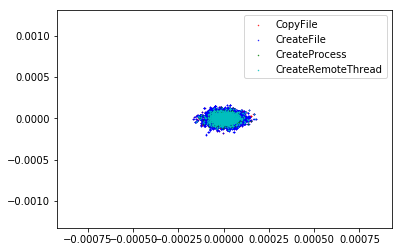

In [51]:
plt.scatter(X_embeded[7:90699,0],X_embeded[7:90699,1],c='r',label='CopyFile',s=0.2)
plt.scatter(X_embeded[90699:562151,0],X_embeded[90699:562151,1],c='b',label='CreateFile',s=0.2)
plt.scatter(X_embeded[562151:568921,0],X_embeded[562151:568921,1],c='g',label='CreateProcess',s=0.2)
plt.scatter(X_embeded[568921:587996,0],X_embeded[568921:587996,1],c='c',label='CreateRemoteThread',s=0.2)
plt.legend()

PCA

In [5]:
pca = PCA(n_components=2,iterated_power='auto', whiten=True,svd_solver="full",random_state=725035) #n_components='mle',395
emb_all_PCA = pca.fit_transform(emb_all)

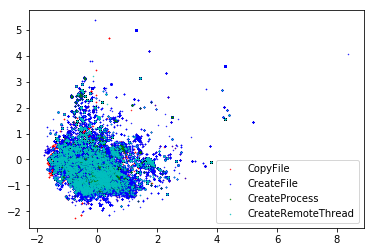

In [58]:
plt.scatter(emb_all_PCA[7:90699,0],emb_all_PCA[7:90699,1],c='r',label='CopyFile',s=0.2)
plt.scatter(emb_all_PCA[90699:562151,0],emb_all_PCA[90699:562151,1],c='b',label='CreateFile',s=0.2)
plt.scatter(emb_all_PCA[562151:568921,0],emb_all_PCA[562151:568921,1],c='g',label='CreateProcess',s=0.2)
plt.scatter(emb_all_PCA[568921:587996,0],emb_all_PCA[568921:587996,1],c='c',label='CreateRemoteThread',s=0.2)
plt.legend()

kmeans

In [6]:
cluster = KMeans(init='k-means++',n_init=28,max_iter=350,precompute_distances='auto',algorithm='auto',random_state=725035
                 ,n_clusters=5,n_jobs=cpu_count()-1,verbose=0) #11,305
cluster.fit(emb_all)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=350,
    n_clusters=5, n_init=28, n_jobs=35, precompute_distances='auto',
    random_state=725035, tol=0.0001, verbose=0)

  6%|▌         | 193158/3498692 [5:26:01<92:59:12,  9.87it/s]

KeyboardInterrupt: 

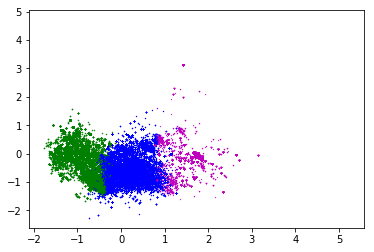

In [65]:
for i  in tqdm(range(emb_all_PCA.shape[0])):
    if cluster.labels_[i] == 0:
        c0 = plt.scatter(emb_all_PCA[i,0],emb_all_PCA[i,1],c='r', marker='+',s=0.25)
    elif cluster.labels_[i] == 1:
        c1 = plt.scatter(emb_all_PCA[i,0],emb_all_PCA[i,1],c='g', marker='o',s=0.25)
    elif cluster.labels_[i] == 2:
        c2 = plt.scatter(emb_all_PCA[i,0],emb_all_PCA[i,1],c='b', marker='*',s=0.25)
    elif cluster.labels_[i] == 3:
        c3 = plt.scatter(emb_all_PCA[i,0],emb_all_PCA[i,1],c='y', marker='s',s=0.25)
    else:
        c4 = plt.scatter(emb_all_PCA[i,0],emb_all_PCA[i,1],c='m', marker='2',s=0.25)
plt.legend([c0, c1, c2, c3,c4],[ 'Cluster 0','Cluster 1', 'Cluster 2','Cluster 3','Cluster 4'])
plt.show()

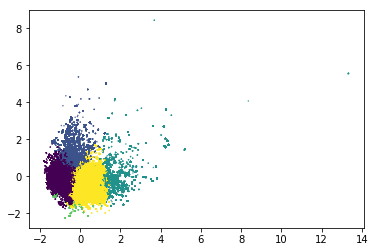

In [7]:
plt.scatter(emb_all_PCA[:, 0], emb_all_PCA[:, 1], c=cluster.labels_,s=0.2)

In [14]:
cluster.labels_[568921:569921]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
cluster.labels_[587096:587996]

以上確認每個部份，每個api call是被分進去哪一類

move profile to corresponding tree

In [27]:
in_dir = 'data/tree-rep-logs/'
profile_dir = 'data/aries_simplified_profile_1002/'
out_dir = 'data/tree-rep-logs-profile/'
for family in tqdm(next(os.walk(in_dir))[1]):
    for tree in next(os.walk(in_dir+family))[1]:
        outpath = out_dir+family+'/'+tree+'/'
        for hkl in next(os.walk(in_dir+family+'/'+tree+'/'))[2]:
            if os.path.isfile(profile_dir+hkl):
                if not os.path.exists(outpath):
                    os.makedirs(outpath)
                shutil.copy(profile_dir+hkl, outpath+hkl)
#                 print(hkl)
#             break

100%|██████████| 80/80 [00:00<00:00, 100.02it/s]


count profile's Q1、Q3

In [100]:
profile_dir = 'data/aries_simplified_profile_1002/'
length = []
for hkl in next(os.walk(profile_dir))[2]:
    with open(profile_dir+hkl, encoding='ISO 8859-1') as f:
        profile = f.read().splitlines()
    length.append(len(profile))
print(min(length),max(length),np.mean(length),np.std(length),np.quantile(length,0.25),np.quantile(length,0.5),np.quantile(length,0.75))

0 27165 175.04838144794115 590.1331112711937 24.0 86.0 160.0


In [105]:
print(np.quantile(length,0.1),np.quantile(length,0.2),np.quantile(length,0.3),np.quantile(length,0.4),np.quantile(length,0.5))
print(np.quantile(length,0.6) , np.quantile(length,0.7) ,np.quantile(length,0.8) ,np.quantile(length,0.9))
print(np.quantile(length,0.75) , np.quantile(length,0.85),np.quantile(length,0.95),np.quantile(length,0.99))
np.quantile(length,0.96),np.quantile(length,0.97),np.quantile(length,0.98)

8.0 18.0 32.0 61.0 86.0
104.0 116.0 243.0 498.0
160.0 288.0 599.0 1237.0


(675.0, 734.2599999999948, 906.0)

/home/leoqaz12/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.99844899, 0.99894932, 0.99919948, 0.99934958, 0.99954971,
        0.99954971, 0.99964977, 0.99979987, 0.99979987, 1.        ]),
 array([    0. ,  2716.5,  5433. ,  8149.5, 10866. , 13582.5, 16299. ,
        19015.5, 21732. , 24448.5, 27165. ]),
 <a list of 1 Patch objects>)

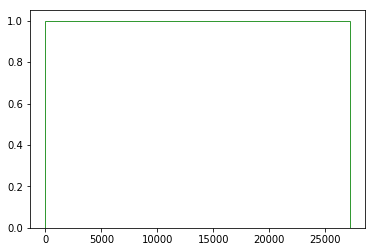

In [33]:
plt.hist(sorted(length),normed=True,cumulative=True,label='CDF',histtype='step',alpha=0.8,color='G')

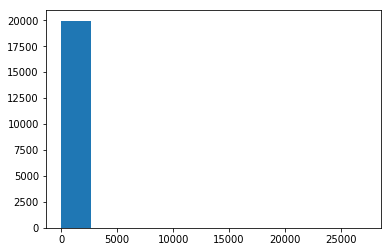

In [37]:
plt.hist(np.array(length))
plt.show()

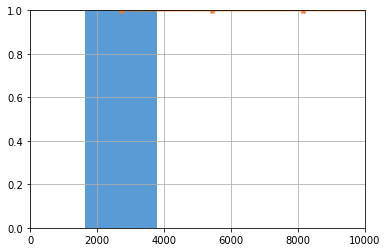

In [60]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

arr = np.array(sorted(length))

hist, bin_edges = np.histogram(arr)
width = (bin_edges[1] - bin_edges[0]) * 0.8
plt.bar(bin_edges[1:], hist/max(hist), width=width, color='#5B9BD5')

cdf = np.cumsum(hist/sum(hist))
plt.plot(bin_edges[1:], cdf, '-*', color='#ED7D31')

plt.xlim([0, 10000])
plt.ylim([0, 1])
plt.grid()

plt.show()

In [68]:
from collections import Counter
len_dict = dict(Counter(length))
len_dict = sorted(len_dict.items())
len_dict

[(0, 459),
 (1, 211),
 (2, 303),
 (3, 171),
 (4, 105),
 (5, 81),
 (6, 146),
 (7, 367),
 (8, 532),
 (9, 229),
 (10, 140),
 (11, 156),
 (12, 248),
 (13, 187),
 (14, 102),
 (15, 186),
 (16, 78),
 (17, 288),
 (18, 85),
 (19, 167),
 (20, 224),
 (21, 161),
 (22, 152),
 (23, 100),
 (24, 135),
 (25, 170),
 (26, 75),
 (27, 90),
 (28, 106),
 (29, 178),
 (30, 91),
 (31, 96),
 (32, 271),
 (33, 287),
 (34, 75),
 (35, 89),
 (36, 100),
 (37, 82),
 (38, 62),
 (39, 45),
 (40, 75),
 (41, 62),
 (42, 68),
 (43, 46),
 (44, 37),
 (45, 57),
 (46, 52),
 (47, 80),
 (48, 90),
 (49, 99),
 (50, 29),
 (51, 35),
 (52, 51),
 (53, 62),
 (54, 43),
 (55, 62),
 (56, 45),
 (57, 47),
 (58, 55),
 (59, 22),
 (60, 21),
 (61, 64),
 (62, 77),
 (63, 105),
 (64, 180),
 (65, 101),
 (66, 117),
 (67, 29),
 (68, 104),
 (69, 135),
 (70, 33),
 (71, 77),
 (72, 60),
 (73, 57),
 (74, 59),
 (75, 85),
 (76, 77),
 (77, 28),
 (78, 43),
 (79, 32),
 (80, 9),
 (81, 21),
 (82, 42),
 (83, 34),
 (84, 30),
 (85, 324),
 (86, 335),
 (87, 282),
 (88, 

In [74]:
df = pd.DataFrame(len_dict).T
df.to_excel('output/length_profile_cdf.xlsx',columns=None,index=None)

count rep cdf/pdf

In [95]:
in_dir = 'data/tree-rep-logs/'
length_count=[]
for family in tqdm(next(os.walk(in_dir))[1]):
    for tree in next(os.walk(in_dir+family))[1]:
        length_count.append(len(pickle.load(open(in_dir+family+'/'+tree+'/rep.pickle','rb'))))
        

# pickle.load(open('data/tree-rep-logs/adload_0.8/G23/rep.pickle','rb'))

100%|██████████| 80/80 [00:00<00:00, 722.43it/s]


In [96]:
rep_len = sorted(dict(Counter(length_count)).items())
rep_len

[(1, 178),
 (2, 85),
 (3, 56),
 (4, 34),
 (5, 35),
 (6, 28),
 (7, 43),
 (8, 23),
 (9, 15),
 (10, 19),
 (11, 17),
 (12, 13),
 (13, 18),
 (14, 14),
 (15, 8),
 (16, 10),
 (17, 21),
 (18, 15),
 (19, 8),
 (20, 11),
 (21, 5),
 (22, 10),
 (23, 10),
 (24, 7),
 (25, 8),
 (26, 3),
 (27, 4),
 (28, 6),
 (29, 11),
 (30, 4),
 (31, 17),
 (32, 11),
 (33, 4),
 (34, 5),
 (35, 10),
 (36, 8),
 (37, 8),
 (39, 3),
 (40, 7),
 (41, 5),
 (42, 5),
 (43, 2),
 (44, 4),
 (45, 3),
 (46, 5),
 (47, 10),
 (48, 7),
 (49, 2),
 (51, 1),
 (52, 8),
 (53, 2),
 (54, 3),
 (55, 3),
 (56, 19),
 (57, 5),
 (58, 1),
 (59, 8),
 (60, 3),
 (61, 5),
 (62, 4),
 (63, 3),
 (64, 14),
 (65, 5),
 (66, 5),
 (67, 1),
 (68, 4),
 (69, 4),
 (71, 1),
 (72, 2),
 (73, 5),
 (74, 1),
 (75, 3),
 (76, 6),
 (77, 19),
 (78, 3),
 (79, 2),
 (80, 1),
 (81, 4),
 (82, 2),
 (83, 3),
 (84, 2),
 (85, 3),
 (86, 2),
 (87, 1),
 (88, 2),
 (89, 1),
 (90, 6),
 (91, 9),
 (92, 6),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 2),
 (97, 1),
 (98, 3),
 (99, 8),
 (100, 9),
 (101, 11

In [97]:
df = pd.DataFrame(rep_len).T
df.to_excel('output/length_REP_cdf2.xlsx')

In [124]:
pickle.load(open('data/tree-rep-logs-profile/eggnog_0.8/G114/parameter_rep.pickle','rb'))

['<BOS>',
 'LoadLibrary#PR@SYS@mapi@DLL#Ret#N',
 'LoadLibrary#PR@SYS@shell@{A48F1A32-A340-11D1-BC6B-00A0C90312E1}#Ret#P',
 'LoadLibrary#PR@SYS@wininet@DLL#Ret#P',
 'LoadLibrary#PR@SYS@advapi32@DLL#Ret#P',
 'LoadLibrary#PR@SYS@advapi32@DLL#Ret#P',
 'LoadLibrary#PR@ARB@windowsshell@MANIFEST#Ret#N',
 'CreateFile#PR@ARB@MANIFEST#PR@GENERIC_READ#PR@OPEN_EXISTING#PR@FILE_SHARE_DELETE;FILE_SHARE_READ#Ret#P',
 'RegQueryValue#PR@HKCU@desktop\\#PR@SUBK@smoothscroll#PR@0#PR@77462a48#Ret#P',
 'RegQueryValue#PR@HKCU@soft_ms_win_explorer\\advanced#PR@SUBK@enableballoontips#PR@0#PR@77462170#Ret#P',
 'RegEnumValue#PR@HKLM@soft_ms_winNT_languagepack\\*#PR@SUBK@surr#PR@REG_DWORD#PR@2#Ret#0',
 'RegCreateKey#PR@HKCU@hkey_current_user#PR@SOFTWARE\\Microsoft\\Windows\\CurrentVersion\\Internet Settings#Ret#0',
 'CreateFile#PR@USR@EXE#PR@GENERIC_READ#PR@OPEN_EXISTING#PR@FILE_SHARE_READ#Ret#P',
 'CopyFile#PR@USR@EXE#PR@ARB@EXE#Ret#P',
 'CreateFile#PR@USR@EXE#PR@GENERIC_READ#PR@OPEN_EXISTING#PR@FILE_SHARE_READ#